In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa 
import IPython.display as ipd
import os
import soundfile as sf
import random

In [2]:
def reading_and_plotting_audio(path):
    plt.figure(figsize = (15, 6))
    data, sample_rate = librosa.load(path)
    librosa.display.waveshow(data, sr = sample_rate)

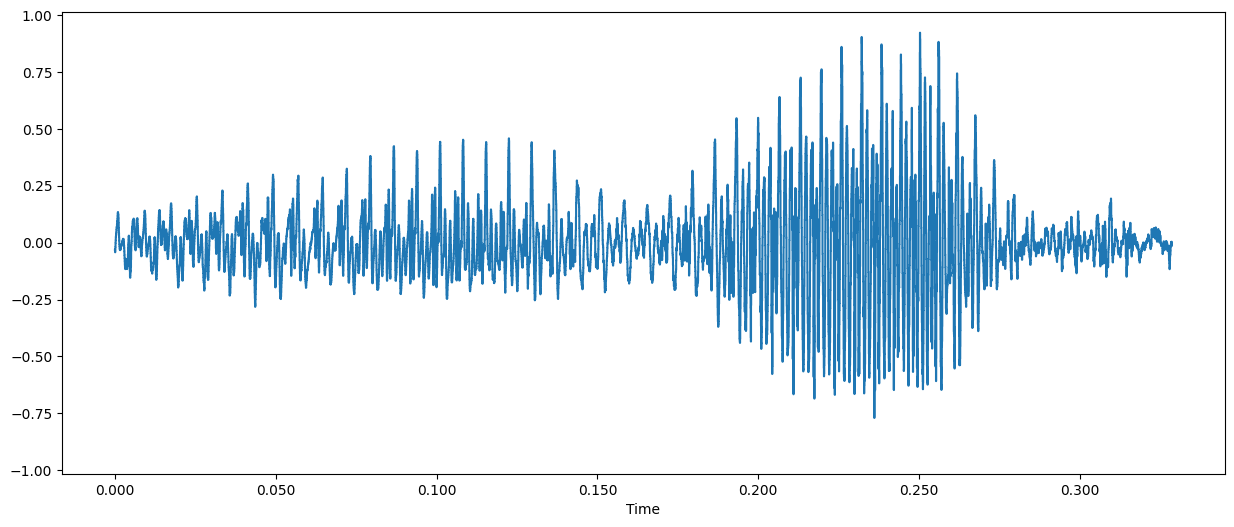

In [3]:
reading_and_plotting_audio("C:\\Users\\YAMAMA\\OneDrive\\سطح المكتب\\New folder (3)\\Geda\\1.wav")

In [10]:
paths = []
for dirname, _, filenames in os.walk("C:/Users/YAMAMA/OneDrive/سطح المكتب/New folder (3)"):
    for filename in filenames:
        audio_path = os.path.join(dirname, filename)
        paths.append(audio_path)

In [11]:
file_paths = []
for path in paths:
    new_path = path.replace("\\","/")
    file_paths.append(new_path)

In [12]:
file_paths[5]

'C:/Users/YAMAMA/OneDrive/سطح المكتب/New folder (3)/7masa/2.wav'

In [13]:
# data augmentation
def adding_noise(signal, noise_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    aigmented_signal = signal + noise*noise_factor
    return aigmented_signal

def time_stretching(signal, stretch_rate):
    return librosa.effects.time_stretch(signal,rate = stretch_rate)

def pitch_scaling(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(y =signal, sr=sr, n_steps = num_semitones)

def inver_polarity(signal):
    return signal * -1

def random_gain(signal, min_gain_factor, max_gain_factor):
    gain_factor = random.uniform(min_gain_factor, max_gain_factor)
    return signal * gain_factor

def feature_extractor(file):
    audio, sr = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=50)
    scaled = np.mean(mfccs_features.T, axis = 0)
    return scaled

Data augmentation (dont run)

In [14]:
def applying_augmentation():
    for file in file_paths:
        name = file.split("/")[-1]
        new = "/".join([word for word in file.split("/") if word != name])

        data, sample_rate = librosa.load(file)
        new_signal = random_gain(data,2,4)
        sf.write("/".join([new,f"gain,{name}"]),new_signal,sample_rate)
        new_signal = adding_noise(data,random.uniform(0.1, 0.4))
        sf.write("/".join([new,f"noise,{name}"]),new_signal,sample_rate)
        new_signal = time_stretching(data,random.uniform(0.6, 0.9))
        sf.write("/".join([new,f"time,{name}"]),new_signal,sample_rate)
        new_signal = pitch_scaling(data,sample_rate,2)
        sf.write("/".join([new,f"pitch,{name}"]),new_signal,sample_rate)
        new_signal = inver_polarity(data)
        sf.write("/".join([new,f"polarity,{name}"]),new_signal,sample_rate)

In [15]:
applying_augmentation()

In [80]:
random.uniform(0.1, 0.4)

0.1171806779909118